# Scraping notebook
From this notebook you can manually run the news articles scraping process and have some monitoring graphs
## Start scraping

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from itertools import product
from datetime import datetime, timedelta

import numpy as np
from tqdm import tqdm

from elections import constants
from elections.scrapers.news_scraper import NewsScraper

In [3]:
SCRAPE_END_DATE = datetime(2024, 3, 9) #datetime.now()
SCRAPE_START_DATE = SCRAPE_END_DATE - timedelta(1)

print(f"Scraping news articles from {SCRAPE_START_DATE} to {SCRAPE_END_DATE}")

Scraping news articles from 2024-03-08 00:00:00 to 2024-03-09 00:00:00


In [ ]:
np.random.shuffle(constants.POLITICIANS)
print(constants.POLITICIANS)

query_list = list(product(constants.POLITICIANS, constants.NEWS_OUTLETS))

for politician, news_outlet in tqdm(query_list):
    query = f"{politician} {news_outlet}"
    news_finder = NewsScraper(query, SCRAPE_START_DATE, SCRAPE_END_DATE)
    news_finder.get_metadata()
    news_finder.get_article()
    news_finder.save_articles()

## Validate scrape

In [ ]:
NewsScraper.plot_daily_article_counts()

n_luis_montenegro       2127
n_pedro_nuno_santos     2031
n_ines_de_sousa_real     165
n_mariana_mortagua       858
n_andre_ventura         1334
n_paulo_raimundo         677
n_rui_tavares            645
n_rui_rocha              825
dtype: int64


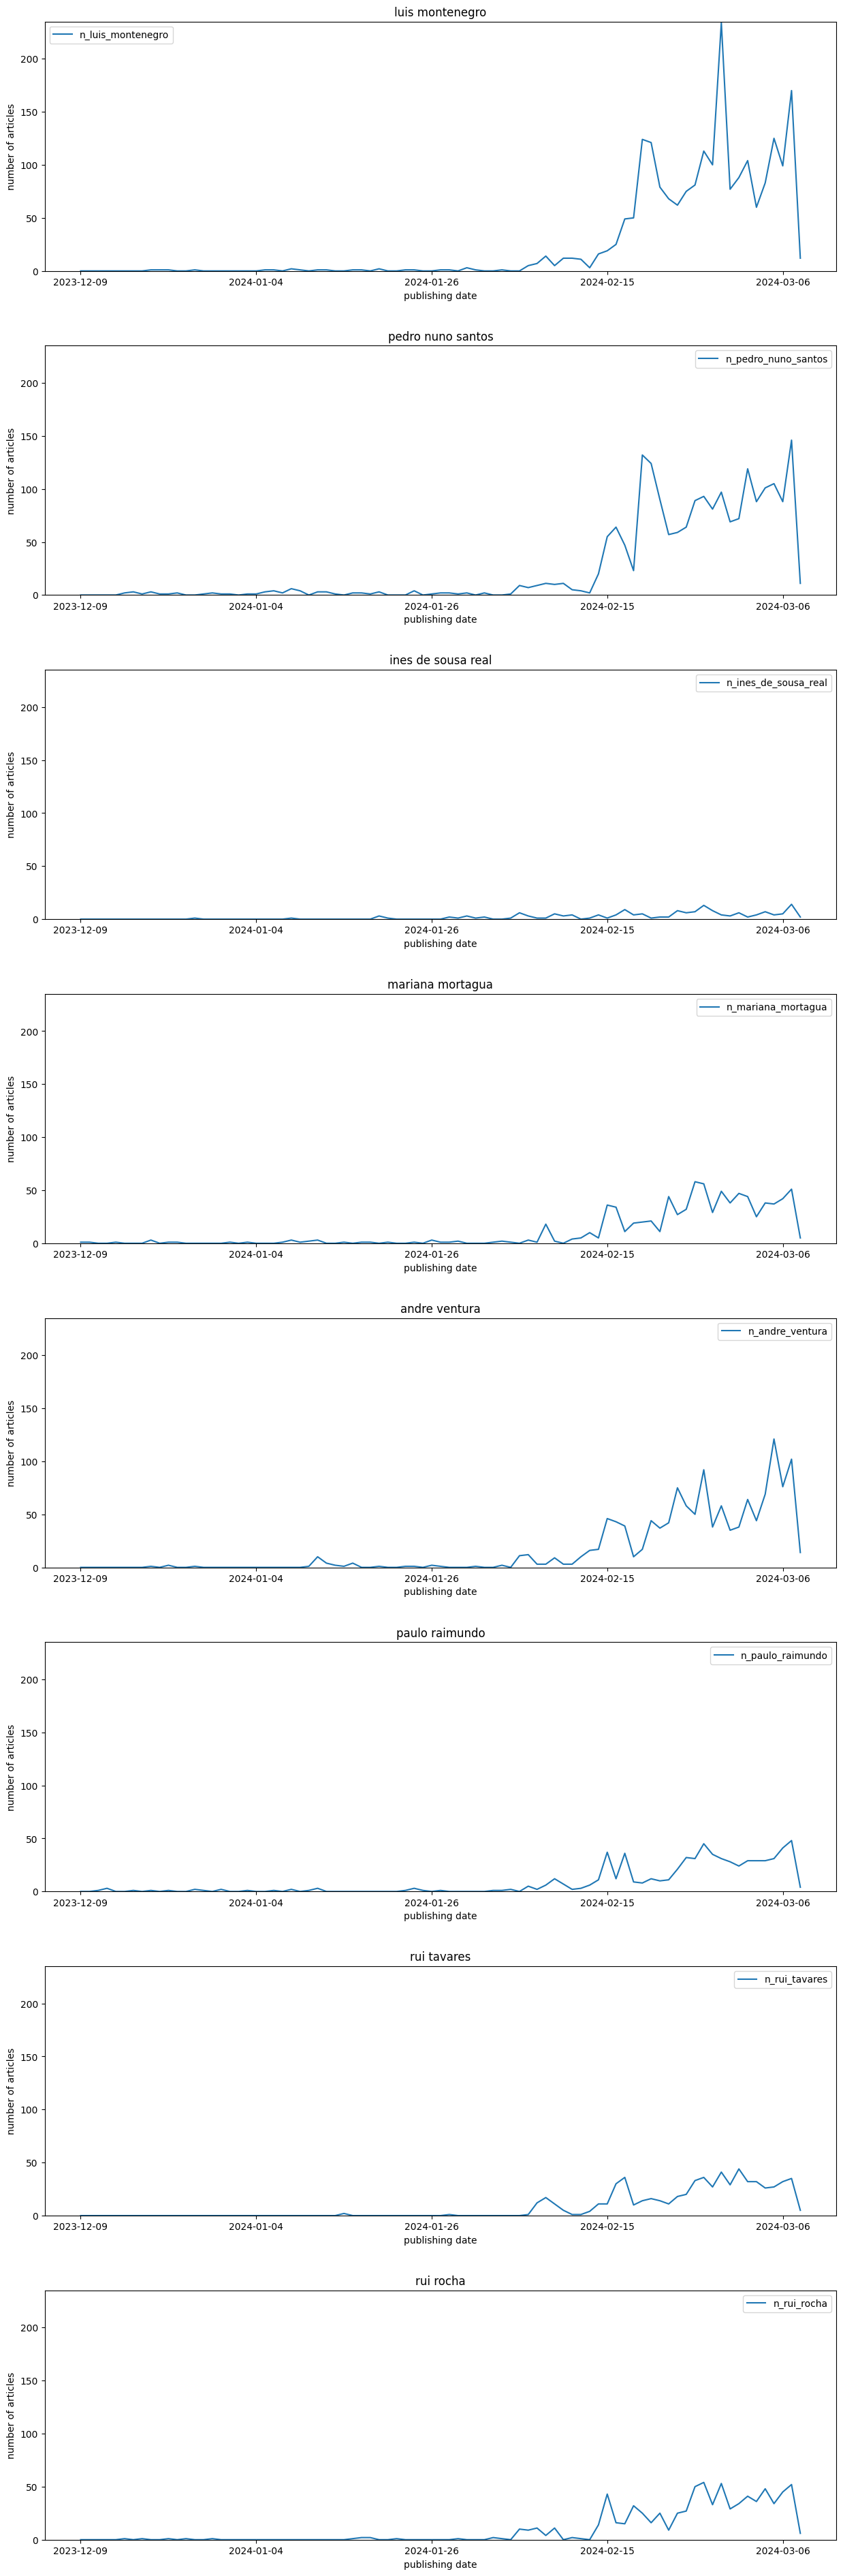

In [53]:
NewsScraper.plot_daily_politician_ref_counts()